In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Libraries and Preprocessing

In [2]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Resume Data/Resume.csv')

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def preprocess(txt):
    txt = txt.lower()
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub('http\S+\s*', ' ', txt)
    txt = re.sub('RT|cc', ' ', txt)
    txt = re.sub('#\S+', '', txt)
    txt = re.sub('@\S+', '  ', txt)
    txt = re.sub('\s+', ' ', txt)
    txt = word_tokenize(txt)
    stop_words = set(stopwords.words('english'))
    txt = [w for w in txt if not w in stop_words]
    lemmatizer = nltk.stem.WordNetLemmatizer()
    txt = [lemmatizer.lemmatize(w) for w in txt]
    return ' '.join(txt)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
df.head(2)

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR


In [6]:
nltk.download('wordnet')
df['Resume'] = df['Resume_str'].apply(lambda w: preprocess(w))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('state', 16786), ('company', 15723), ('city', 15121), ('management', 12180), ('name', 11752), ('customer', 11345), ('service', 9070), ('sale', 8553), ('skill', 8199), ('business', 8089), ('project', 7889), ('system', 7256), ('team', 7117), ('client', 6516), ('new', 6409), ('development', 5810), ('experience', 5783), ('training', 5754), ('manager', 5557), ('work', 5226), ('process', 5200), ('program', 4994), ('product', 4864), ('information', 4504), ('marketing', 4489), ('office', 4435), ('employee', 4391), ('financial', 4227), ('support', 4206), ('professional', 4190), ('education', 4101), ('including', 4045), ('staff', 3977), ('report', 3881), ('data', 3797), ('communication', 3738), ('operation', 3714), ('year', 3703), ('design', 3664), ('university', 3515), ('student', 3507), ('managed', 3432), ('plan', 3419), ('quality', 3395), ('developed', 3228), ('analysis', 3144), ('member', 3073), ('time', 2965), ('high', 2950), ('budget', 2918)]


#EDA

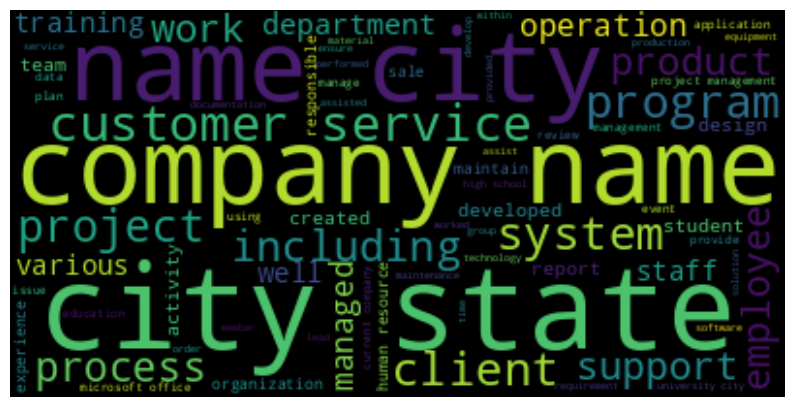

In [8]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
#category lsit
categories = np.sort(df['Category'].unique())
categories

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [10]:
df_categories = [df[df['Category'] == category].loc[:, ['Resume', 'Category']] for category in categories]
df_categories

[                                                 Resume    Category
 1808  ountant professional summary current ountant c...  ACCOUNTANT
 1809  ountant summary innovative energetic ountant p...  ACCOUNTANT
 1810  ountant highlight microsoft office intermediat...  ACCOUNTANT
 1811  ountant professional summary inpatient outpati...  ACCOUNTANT
 1812  ountant summary pursue excellence dynamic busi...  ACCOUNTANT
 ...                                                 ...         ...
 1921  general ountant professional summary around ye...  ACCOUNTANT
 1922  staff ountant professional summary currently g...  ACCOUNTANT
 1923  general ountant summary year experienced profe...  ACCOUNTANT
 1924  project ountant career focus dedicated focused...  ACCOUNTANT
 1925  senior ountant summary highly competent motiva...  ACCOUNTANT
 
 [118 rows x 2 columns],
                                                 Resume  Category
 439  advocate professional summary conscientious at...  ADVOCATE
 440  advocat

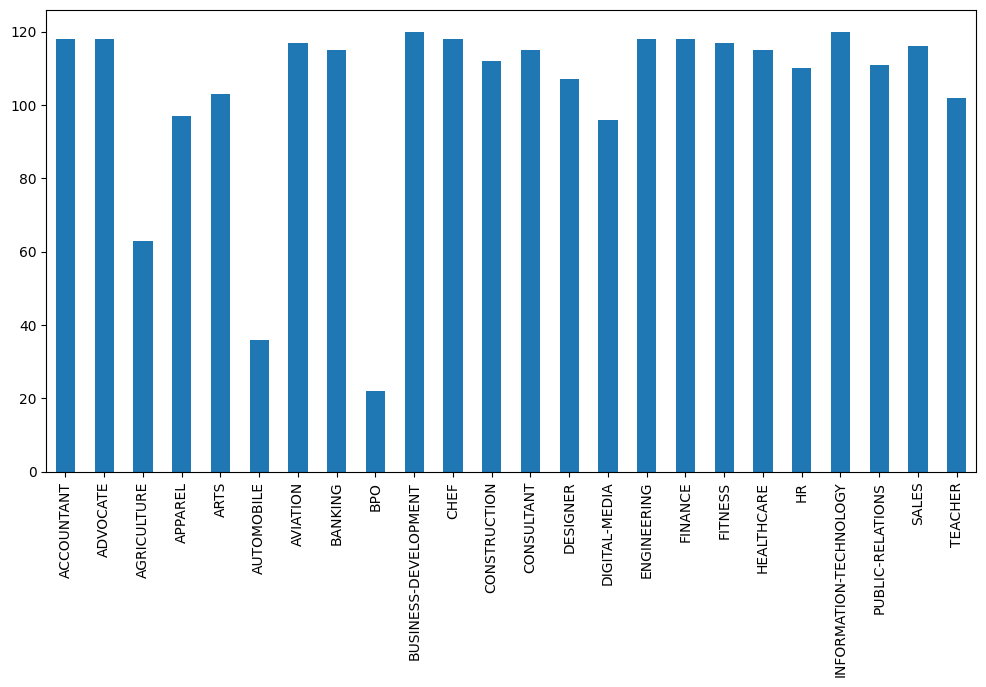

In [11]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [12]:
category_counts = df['Category'].value_counts()

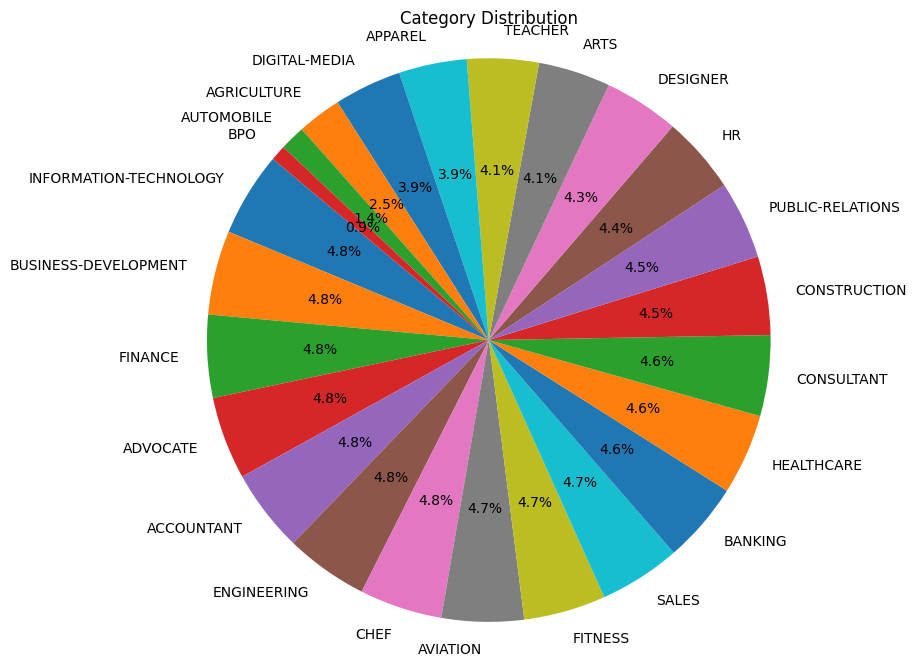

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Category Distribution')
plt.show()

In [14]:
def wordfreq(df):
    count = df['Resume'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']
    return count.head(10)

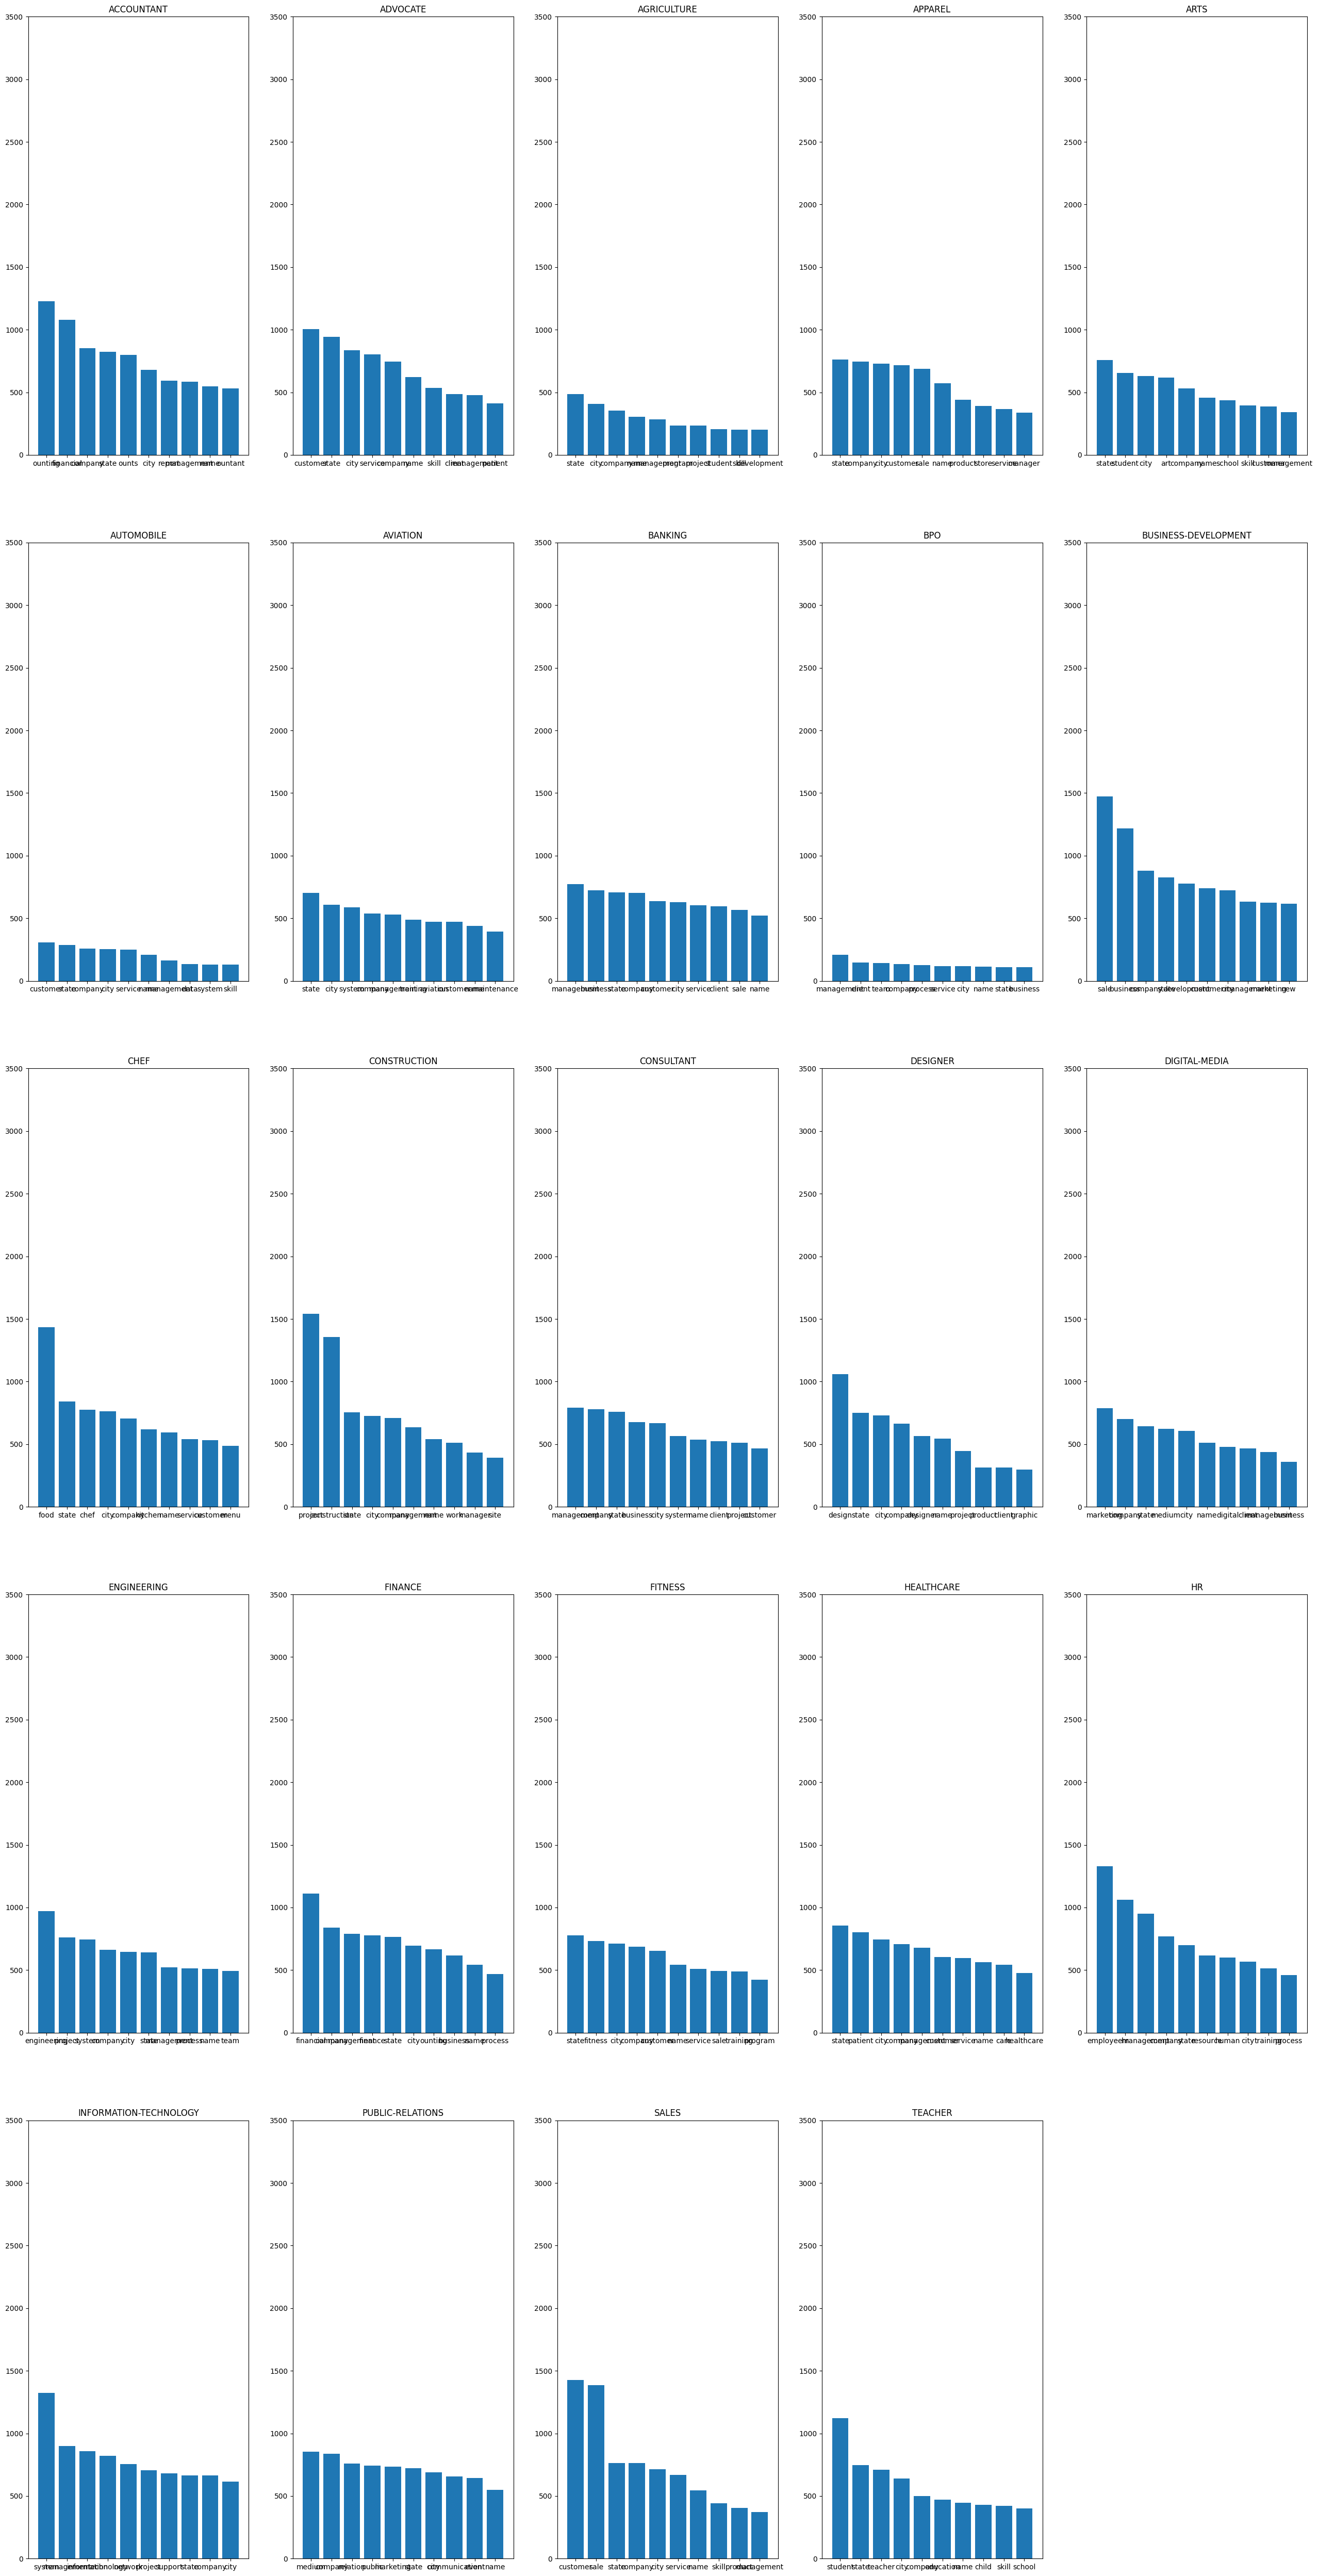

In [15]:
fig = plt.figure(figsize=(32, 64))
for i, category in enumerate(categories):
    wf = wordfreq(df_categories[i])
    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 3500)

plt.show()
plt.close()

In [16]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['Resume'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,shuffle=True, stratify=requiredTarget)

#KNN Pipeline

In [19]:
# knn_clf = OneVsRestClassifier(KNeighborsClassifier())
# knn_clf.fit(X_train, y_train)
# prediction = knn_clf.predict(X_test)
# print('Accuracy of KNN Classifier on training set: {:.2f}'.format(knn_clf.score(X_train, y_train)))
# print('Accuracy of KNN Classifier on test set:     {:.2f}'.format(knn_clf.score(X_test, y_test)))

In [20]:
# print("\n Classification report for KNN classifier %s:\n%s\n" % (knn_clf, metrics.classification_report(y_test, prediction)))

#Random Forest Cls

In [21]:
from sklearn.preprocessing import PolynomialFeatures
import sklearn
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf_clf = OneVsRestClassifier(RandomForestClassifier())
rf_clf.fit(X_train, y_train)
prediction = rf_clf.predict(X_test)
print('Accuracy of RF Classifier on training set: {:.2f}'.format(rf_clf.score(X_train, y_train)))
print('Accuracy of RF Classifier on test set:     {:.2f}'.format(rf_clf.score(X_test, y_test)))

Accuracy of RF Classifier on training set: 1.00
Accuracy of RF Classifier on test set:     0.60


In [22]:
print("\n Classification report for RF classifier %s:\n%s\n" % (rf_clf, metrics.classification_report(y_test, prediction)))


 Classification report for RF classifier OneVsRestClassifier(estimator=RandomForestClassifier()):
              precision    recall  f1-score   support

           0       0.59      0.83      0.69        24
           1       0.60      0.38      0.46        24
           2       0.86      0.46      0.60        13
           3       0.71      0.26      0.38        19
           4       0.80      0.19      0.31        21
           5       0.67      0.29      0.40         7
           6       0.69      0.75      0.72        24
           7       0.78      0.61      0.68        23
           8       0.00      0.00      0.00         4
           9       0.48      0.54      0.51        24
          10       0.75      0.75      0.75        24
          11       0.68      0.77      0.72        22
          12       0.33      0.09      0.14        23
          13       0.71      0.81      0.76        21
          14       0.64      0.37      0.47        19
          15       0.64      0.67   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Gradient Boosting cls

In [23]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100)
gb_clf.fit(X_train, y_train)
prediction = gb_clf.predict(X_test)
print('Accuracy of GB Classifier on training set: {:.2f}'.format(gb_clf.score(X_train, y_train)))
print('Accuracy of GB Classifier on test set:     {:.2f}'.format(gb_clf.score(X_test, y_test)))

Accuracy of GB Classifier on training set: 1.00
Accuracy of GB Classifier on test set:     0.73


In [24]:
print("\n Classification report for GB classifier %s:\n%s\n" % (gb_clf, metrics.classification_report(y_test, prediction)))


 Classification report for GB classifier GradientBoostingClassifier():
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.77      0.83      0.80        24
           2       0.67      0.46      0.55        13
           3       0.75      0.47      0.58        19
           4       0.35      0.43      0.38        21
           5       0.00      0.00      0.00         7
           6       0.94      0.71      0.81        24
           7       0.81      0.74      0.77        23
           8       0.67      0.50      0.57         4
           9       0.59      0.67      0.63        24
          10       0.87      0.83      0.85        24
          11       0.95      0.91      0.93        22
          12       0.59      0.57      0.58        23
          13       0.80      0.95      0.87        21
          14       0.85      0.58      0.69        19
          15       0.72      0.75      0.73        24
         

#Light Gradient Boosting Machine

In [25]:
import lightgbm as lgb
#model = lgb.LGBMClassifier()

lgb_clf = lgb.LGBMClassifier()
lgb_clf.fit(X_train, y_train)
prediction = lgb_clf.predict(X_test)
print('Accuracy of LGB Classifier on training set: {:.2f}'.format(lgb_clf.score(X_train, y_train)))
print('Accuracy of LGB Classifier on test set:     {:.2f}'.format(lgb_clf.score(X_test, y_test)))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084954 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 164388
[LightGBM] [Info] Number of data points in the train set: 1987, number of used features: 3796
[LightGBM] [Info] Start training from score -3.051086
[LightGBM] [Info] Start training from score -3.051086
[LightGBM] [Info] Start training from score -3.682358
[LightGBM] [Info] Start training from score -3.237672
[LightGBM] [Info] Start training from score -3.187662
[LightGBM] [Info] Start training from score -4.227085
[LightGBM] [Info] Start training from score -3.061782
[LightGBM] [Info] Start training from score -3.072593
[LightGBM] [Info] Start training from score -4.704009
[LightGBM] [Info] Start training from score -3.030033
[LightGBM] [Info] Start training from score -3.051086
[LightGBM] [Info] Start training from score -3.094572
[LightGBM] [Info] Start training from score -3.072593
[Li

In [26]:
print("\n Classification report for LGB classifier %s:\n%s\n" % (lgb_clf, metrics.classification_report(y_test, prediction)))


 Classification report for LGB classifier LGBMClassifier():
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        24
           1       0.88      0.88      0.88        24
           2       1.00      0.54      0.70        13
           3       0.67      0.42      0.52        19
           4       0.56      0.43      0.49        21
           5       0.67      0.29      0.40         7
           6       0.90      0.79      0.84        24
           7       0.80      0.70      0.74        23
           8       0.50      0.25      0.33         4
           9       0.65      0.71      0.68        24
          10       0.90      0.79      0.84        24
          11       0.90      0.86      0.88        22
          12       0.70      0.61      0.65        23
          13       0.81      1.00      0.89        21
          14       0.81      0.68      0.74        19
          15       0.73      0.92      0.81        24
          16       0

#Voting classifiers

In [27]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [28]:
# Instantiate base classifiers
lgb_clf = lgb.LGBMClassifier()
tree_clf = DecisionTreeClassifier()
gb_clf = GradientBoostingClassifier()

voting_clf = VotingClassifier(estimators=[
    ('lgb', lgb_clf),
    ('tree', tree_clf),
    ('gb', gb_clf),
    ('rf', rf_clf)], voting='soft')

voting_clf.fit(X_train, y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.112390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 164388
[LightGBM] [Info] Number of data points in the train set: 1987, number of used features: 3796
[LightGBM] [Info] Start training from score -3.051086
[LightGBM] [Info] Start training from score -3.051086
[LightGBM] [Info] Start training from score -3.682358
[LightGBM] [Info] Start training from score -3.237672
[LightGBM] [Info] Start training from score -3.187662
[LightGBM] [Info] Start training from score -4.227085
[LightGBM] [Info] Start training from score -3.061782
[LightGBM] [Info] Start training from score -3.072593
[LightGBM] [Info] Start training from score -4.704009
[LightGBM] [Info] Start training from score -3.030033
[LightGBM] [Info] Start training from score -3.051086
[LightGBM] [Info] Start training from score -3.

VotingClassifier(estimators=[('lgb', LGBMClassifier()),
                             ('tree', DecisionTreeClassifier()),
                             ('gb', GradientBoostingClassifier()),
                             ('rf',
                              OneVsRestClassifier(estimator=RandomForestClassifier()))],
                 voting='soft')

In [29]:
y_pred_train = voting_clf.predict(X_train)
y_pred_test = voting_clf.predict(X_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Accuracy of Voting Classifier on training set: {:.2f}'.format(accuracy_train))
print('Accuracy of Voting Classifier on test set:     {:.2f}'.format(accuracy_test))

Accuracy of Voting Classifier on training set: 1.00
Accuracy of Voting Classifier on test set:     0.74


In [30]:
print("\n Classification report for voting classifier %s:\n%s\n" % (voting_clf, metrics.classification_report(y_test, prediction)))


 Classification report for voting classifier VotingClassifier(estimators=[('lgb', LGBMClassifier()),
                             ('tree', DecisionTreeClassifier()),
                             ('gb', GradientBoostingClassifier()),
                             ('rf',
                              OneVsRestClassifier(estimator=RandomForestClassifier()))],
                 voting='soft'):
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        24
           1       0.88      0.88      0.88        24
           2       1.00      0.54      0.70        13
           3       0.67      0.42      0.52        19
           4       0.56      0.43      0.49        21
           5       0.67      0.29      0.40         7
           6       0.90      0.79      0.84        24
           7       0.80      0.70      0.74        23
           8       0.50      0.25      0.33         4
           9       0.65      0.71      0.68        24
          10 

#LSTM

In [31]:
df.head()

,ID,Resume_str,Resume_html,Category,Resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",19,hr administrator marketing associate hr admini...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",19,hr specialist u hr operation summary versatile...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",19,hr director summary year experience recruiting...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",19,hr specialist summary dedicated driven dynamic...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",19,hr manager skill highlight hr skill hr departm...


In [32]:
df['Resume'] = df['Resume_str'].apply(lambda w: preprocess(w))

In [33]:
from sklearn.utils import shuffle

features = df['Resume'].values
original_labels = df['Category'].values
labels = [str(label).lower().replace(" ", "") for label in original_labels]

features, labels = shuffle(features, labels)
print(features[0])
print(labels[0])

procurement analyst omplishments new professional organization attend seminar event relevant today business market karass effective negotiating training develop key negotiating skill six sigma yellow belt certification professional experience company name march current procurement analyst city state performs strategic sourcing mro maintenance repair operation item company north american manufacturing location well supplier management strategic supplier spend sourcing function include contract strategy development issuance contract rfqs rfps supplier proposal analysis negotiation award implementation responsible supplier performance going management strategic supplier relationship creates integrated process among internal function e g operation purchasing logistics outside supplier support team conducting negotiation financial bid analysis developing talent assist development global commodity strategy implementation plan leverage opportunity across sub commodity monitor compliance order

In [34]:
train_split = 0.8
train_size = int(train_split * len(df))
train_features = features[:train_size]
train_labels = labels[:train_size]
test_features = features[train_size:]
test_labels = labels[train_size:]
print(len(train_labels))
print(len(test_labels))

1987
497


In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
vocab_size = 10000
oov_tok = '<OOV>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)

{'<OOV>': 1, 'state': 2, 'company': 3, 'city': 4, 'management': 5, 'name': 6, 'customer': 7, 'service': 8, 'sale': 9, 'skill': 10, 'business': 11, 'project': 12, 'system': 13, 'team': 14, 'client': 15, 'new': 16, 'development': 17, 'experience': 18, 'training': 19, 'manager': 20, 'work': 21, 'process': 22, 'program': 23, 'product': 24, 'information': 25, 'marketing': 26, 'office': 27, 'employee': 28, 'financial': 29, 'support': 30, 'professional': 31, 'education': 32, 'including': 33, 'staff': 34, 'report': 35, 'data': 36, 'communication': 37, 'operation': 38, 'year': 39, 'design': 40, 'university': 41, 'student': 42, 'managed': 43, 'plan': 44, 'quality': 45, 'developed': 46, 'analysis': 47, 'member': 48, 'time': 49, 'high': 50, 'budget': 51, 'department': 52, 'ounting': 53, 'microsoft': 54, 'current': 55, 'ounts': 56, 'maintained': 57, 'procedure': 58, 'school': 59, 'responsible': 60, 'software': 61, 'need': 62, 'policy': 63, 'performance': 64, 'planning': 65, 'issue': 66, 'material':

In [36]:
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)

test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)

{'9': 1, '20': 2, '0': 3, '10': 4, '15': 5, '1': 6, '16': 7, '17': 8, '6': 9, '22': 10, '12': 11, '18': 12, '7': 13, '11': 14, '21': 15, '19': 16, '13': 17, '4': 18, '23': 19, '3': 20, '14': 21, '2': 22, '5': 23, '8': 24}


In [37]:
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

print(train_feature_padded[0])
print(test_feature_padded[0])

[ 730  325  231   16   31  126 1492  938   72  948 2777   11  150    1
  219 1325   19  152  185 1325   10  773  907 4870 2096  252   31   18
    3    6  518   55  730  325    4    2 1544  138 1314 7333  129  389
   38  298    3  943  619  363  477   81  783    5  138  783 2681 1314
  293  316  151   73   17 4745  151    1 4139  783  456   47  587  197
  182   60  783   64 1580    5  138  783   94 2615  965   22 1275  190
  293  268  696   38  496  543  852  783   30   14 1114  587   29 1365
   47  285  864  180   17  453 3162   73  182   44 2833  234  437 1475
 3162  427  153   84 2205  845 3398  633   74 3162    5  138 1314  827
    5  767  100 2067  620 1059   47  783   94    5  182  437  514 3399
 2542   73 1054  137  514   21  152  453 3162   73  887 1174  548  450
  138   44 3305 1054 1567 3162 1117 2681  373 1054  810  914   55  783
 1999  730 1709 2923  151  153 1054 3710 2162 1413 1054 1567  234   21
 2834  730    8 1292 2140  234 4997   89 3239 4295  548  450  234  143
 3162 

In [38]:
embedding_dim = 128

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 300, 128)         98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 26)                1690      
                                                                 
Total params: 1,425,882
Trainable params: 1,425,882
Non-

In [39]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_feature_padded = np.array(train_feature_padded)
test_feature_padded = np.array(test_feature_padded)
train_label_sequences = np.array(train_label_sequences)
test_label_sequences = np.array(test_label_sequences)

In [40]:
num_epochs = 20
batch_size = 32
history = model.fit(train_feature_padded, train_label_sequences, epochs=num_epochs, batch_size=batch_size, validation_data=(test_feature_padded, test_label_sequences), verbose=2)

Epoch 1/20
63/63 - 31s - loss: 3.1583 - accuracy: 0.0815 - val_loss: 2.8569 - val_accuracy: 0.1811 - 31s/epoch - 497ms/step
Epoch 2/20
63/63 - 12s - loss: 2.3695 - accuracy: 0.3357 - val_loss: 1.9350 - val_accuracy: 0.4588 - 12s/epoch - 197ms/step
Epoch 3/20
63/63 - 9s - loss: 1.4005 - accuracy: 0.6135 - val_loss: 1.4356 - val_accuracy: 0.6439 - 9s/epoch - 143ms/step
Epoch 4/20
63/63 - 8s - loss: 0.8257 - accuracy: 0.7937 - val_loss: 1.3929 - val_accuracy: 0.6559 - 8s/epoch - 124ms/step
Epoch 5/20
63/63 - 7s - loss: 0.5207 - accuracy: 0.8586 - val_loss: 1.3965 - val_accuracy: 0.6579 - 7s/epoch - 105ms/step
Epoch 6/20
63/63 - 7s - loss: 0.3268 - accuracy: 0.9265 - val_loss: 1.4373 - val_accuracy: 0.6801 - 7s/epoch - 108ms/step
Epoch 7/20
63/63 - 6s - loss: 0.2014 - accuracy: 0.9572 - val_loss: 1.5765 - val_accuracy: 0.6680 - 6s/epoch - 88ms/step
Epoch 8/20
63/63 - 8s - loss: 0.1283 - accuracy: 0.9733 - val_loss: 1.7695 - val_accuracy: 0.6479 - 8s/epoch - 123ms/step
Epoch 9/20
63/63 - 4s

In [41]:
score = model.evaluate(test_feature_padded, test_label_sequences, verbose=1)

16/16 [==============================] - 0s 27ms/step - loss: 2.2454 - accuracy: 0.6499


In [42]:
print("Test Accuracy:", score[1])

Test Accuracy: 0.649899423122406


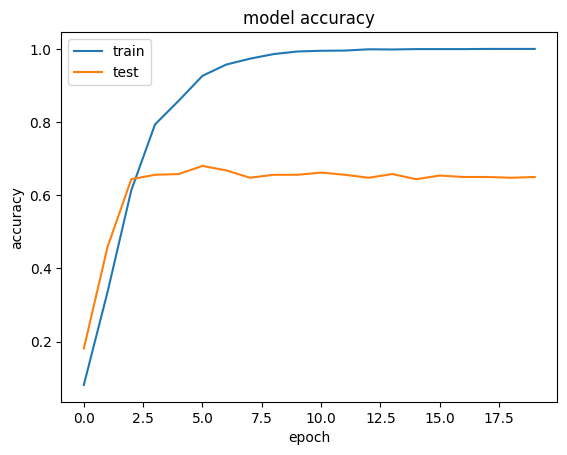

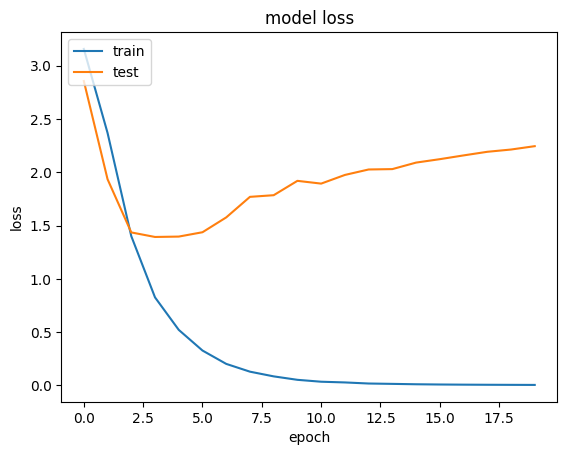

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#BERT Fine Tuned

In [44]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=f274ab66bdfc522eae1598f76988d22ff22554710652ce4dd08f468ea5c92c96
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [45]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.5 MB/s eta 0:00:00


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, wget
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from transformers import AutoTokenizer, TFDistilBertForSequenceClassification
from tensorflow.keras.utils import plot_model
from wordcloud import WordCloud
wget.download("https://raw.githubusercontent.com/yogawicaksana/helper_prabowo/main/helper_prabowo_ml.py",out="helper_prabowo_ml.py")
from helper_prabowo_ml import clean_html, remove_links, remove_special_characters, removeStopWords, remove_, re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
plt.rcParams['figure.figsize'] = (12,8)

In [48]:
df = pd.read_csv('/content/drive/MyDrive/Resume Data/UpdatedResumeDataSet.csv')

In [49]:
labels_dict = {}

for idx, label in enumerate(df.Category.unique()):
    labels_dict[label] = idx

labels_dict

{'Data Science': 0,
 'HR': 1,
 'Advocate': 2,
 'Arts': 3,
 'Web Designing': 4,
 'Mechanical Engineer': 5,
 'Sales': 6,
 'Health and fitness': 7,
 'Civil Engineer': 8,
 'Java Developer': 9,
 'Business Analyst': 10,
 'SAP Developer': 11,
 'Automation Testing': 12,
 'Electrical Engineering': 13,
 'Operations Manager': 14,
 'Python Developer': 15,
 'DevOps Engineer': 16,
 'Network Security Engineer': 17,
 'PMO': 18,
 'Database': 19,
 'Hadoop': 20,
 'ETL Developer': 21,
 'DotNet Developer': 22,
 'Blockchain': 23,
 'Testing': 24}

In [50]:
df.Category = df.Category.apply(func=lambda x: labels_dict[x])
df.Category = df.Category.astype(np.int64)

In [51]:
import re

def clean_html(text):
    cleanr = re.compile('<.*?>')
    return re.sub(cleanr, '', text)

def remove_digits(text):
    return re.sub(r'\d+', '', text)

def remove_links(text):
    return re.sub(r'http\S+', '', text)

def remove_special_characters(text):
    return re.sub(r'[^\w\s]', '', text)

def punct(text):
    return re.sub(r'[!"#$%&()*+,-/:;<=>?@[\]^_`{|}~]', '', text)

def non_ascii(text):
    return ''.join(char for char in text if ord(char) < 128)

def email_address(text):
    return re.sub(r'\S*@\S*\s?', '', text)

def lower(text):
    return text.lower()

In [52]:
def text_preprocess(data,col):
    data[col] = data[col].apply(func=clean_html)
    data[col] = data[col].apply(func=remove_)
    data[col] = data[col].apply(func=removeStopWords)
    data[col] = data[col].apply(func=remove_digits)
    data[col] = data[col].apply(func=remove_links)
    data[col] = data[col].apply(func=remove_special_characters)
    data[col] = data[col].apply(func=punct)
    data[col] = data[col].apply(func=non_ascii)
    data[col] = data[col].apply(func=email_address)
    data[col] = data[col].apply(func=lower)
    return data

In [53]:
df['resume_len'] = df.Resume.apply(len)

In [54]:
preprocessed_df = text_preprocess(df,'Resume')
preprocessed_df.head()

,Category,Resume,resume_len
0,0,skills programming languages python pandas nu...,4786
1,0,education details may may be uitrgpv data sc...,1268
2,0,areas interest deep learning control system de...,1871
3,0,skills r python sap hana tableau sap hana...,6995
4,0,education details mca ymcaust faridabad haryan...,452


In [55]:
tokenizer = AutoTokenizer.from_pretrained("manishiitg/distilbert-resume-parts-classify")
bert_model = TFDistilBertForSequenceClassification.from_pretrained("manishiitg/distilbert-resume-parts-classify",from_pt=True)


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [56]:
train_df, test_df = train_test_split(preprocessed_df,test_size=0.3,shuffle=True,random_state=101)

In [57]:
max_resume_len = 200
X_train = tokenizer(text=train_df.Resume.tolist(),
                   add_special_tokens=True,
                   padding=True,
                   truncation=True,
                   max_length=max_resume_len,
                   return_tensors='tf',
                   return_attention_mask=True,
                   return_token_type_ids=False,
                   verbose=1)

X_test = tokenizer(text=test_df.Resume.tolist(),
                  add_special_tokens=True,
                  padding=True,
                  truncation=True,
                  max_length=max_resume_len,
                  return_tensors='tf',
                  return_attention_mask=True,
                  return_token_type_ids=False,
                  verbose=1)

In [58]:
input_ids = Input(shape=(max_resume_len,),dtype=tf.int32,name='input_ids')
attention_masks = Input(shape=(max_resume_len,),dtype=tf.int32,name='attention_mask')

In [59]:
word_embeddings = bert_model(input_ids,attention_mask=attention_masks)[0] # 0 --> final hidden state, 1 --> pooling output

output = Flatten()(word_embeddings)
output = Dense(units=1024,activation='relu')(output)
output = BatchNormalization()(output)
output = Dropout(0.25)(output)
output = Dense(units=512,activation='relu')(output)
output = Dropout(0.25)(output)
output = Dense(units=256,activation='relu')(output)
output = BatchNormalization()(output)
output = Dropout(0.25)(output)
output = Dense(units=128,activation='relu')(output)
output = Dropout(0.25)(output)
output = Dense(units=64,activation='relu')(output)
output = Dense(units=25,activation='softmax')(output)

model = Model(inputs=[input_ids,attention_masks],outputs=output)
model.layers

In [60]:
model.layers[2].trainable = True

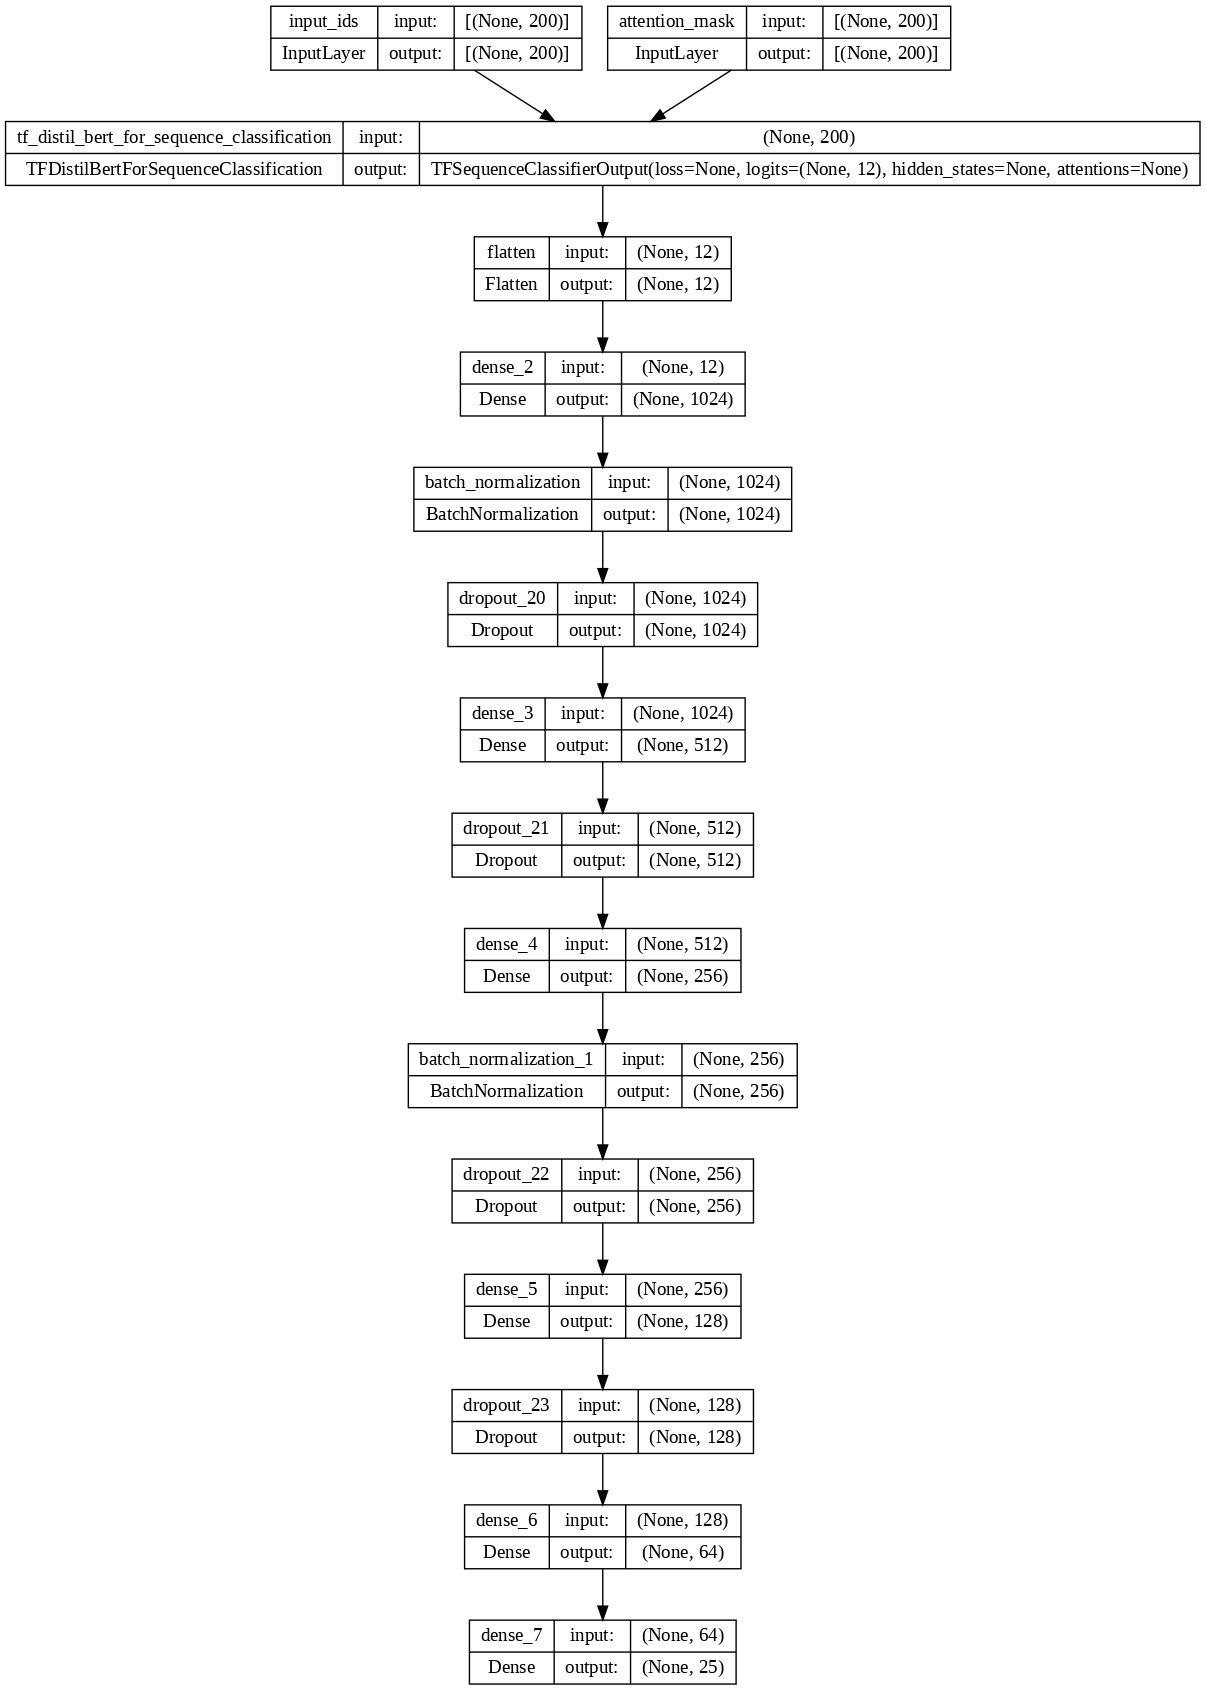

In [61]:
plot_model(model,to_file='model.png',dpi=100,show_shapes=True)

In [62]:
adam = Adam(learning_rate=5e-5,
           epsilon=2e-8,
           clipnorm=1.0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=adam,metrics=SparseCategoricalAccuracy('balanced_accuracy'))


In [63]:
es = EarlyStopping(monitor='val_balanced_accuracy',patience=250,verbose=1,mode='max',restore_best_weights=True)
mc = ModelCheckpoint('resume_parser.h5',monitor='val_balanced_accuracy',mode='max',verbose=1,save_best_only=True)

r = model.fit(x={'input_ids': X_train['input_ids'], 'attention_mask': X_train['attention_mask']},
             y=train_df.Category,
             epochs=500,
             batch_size=32,
             callbacks=[es,mc],
             validation_data=({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']},test_df.Category))

Epoch 1/500
22/22 [==============================] - ETA: 0s - loss: 3.4866 - balanced_accuracy: 0.0386
Epoch 1: val_balanced_accuracy improved from -inf to 0.03806, saving model to resume_parser.h5
22/22 [==============================] - 61s 1s/step - loss: 3.4866 - balanced_accuracy: 0.0386 - val_loss: 3.2141 - val_balanced_accuracy: 0.0381
Epoch 2/500
22/22 [==============================] - ETA: 0s - loss: 3.4030 - balanced_accuracy: 0.0446
Epoch 2: val_balanced_accuracy improved from 0.03806 to 0.05882, saving model to resume_parser.h5
22/22 [==============================] - 20s 915ms/step - loss: 3.4030 - balanced_accuracy: 0.0446 - val_loss: 3.1973 - val_balanced_accuracy: 0.0588
Epoch 3/500
22/22 [==============================] - ETA: 0s - loss: 3.3341 - balanced_accuracy: 0.0624
Epoch 3: val_balanced_accuracy improved from 0.05882 to 0.07612, saving model to resume_parser.h5
22/22 [==============================] - 21s 960ms/step - loss: 3.3341 - balanced_accuracy: 0.0624 -

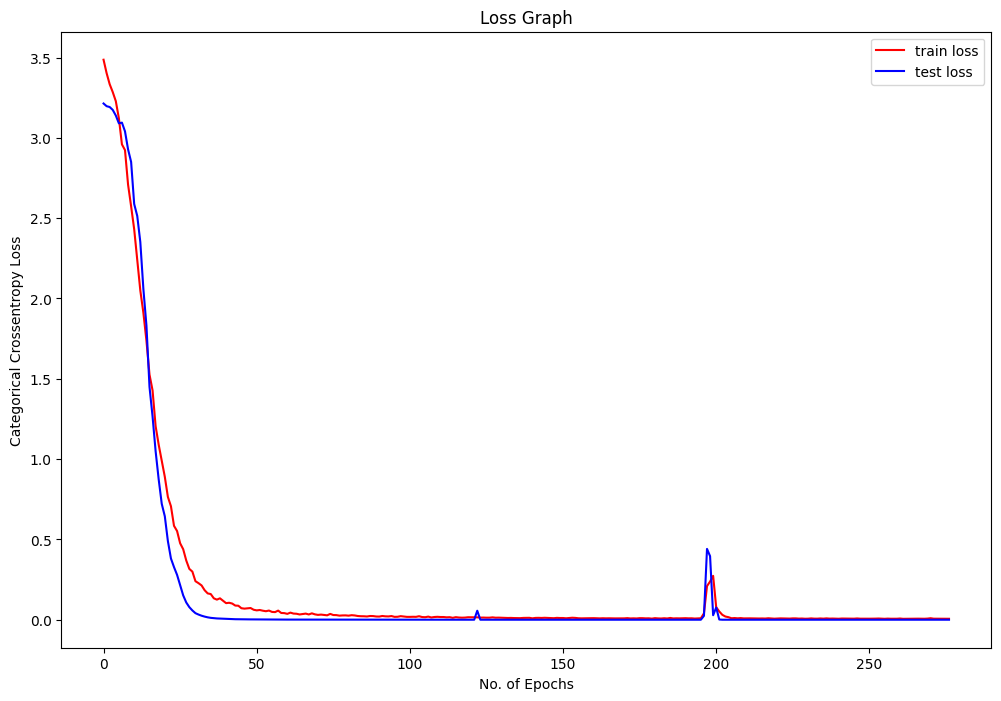

In [64]:
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='test loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Categorical Crossentropy Loss')
plt.title('Loss Graph')
plt.legend();

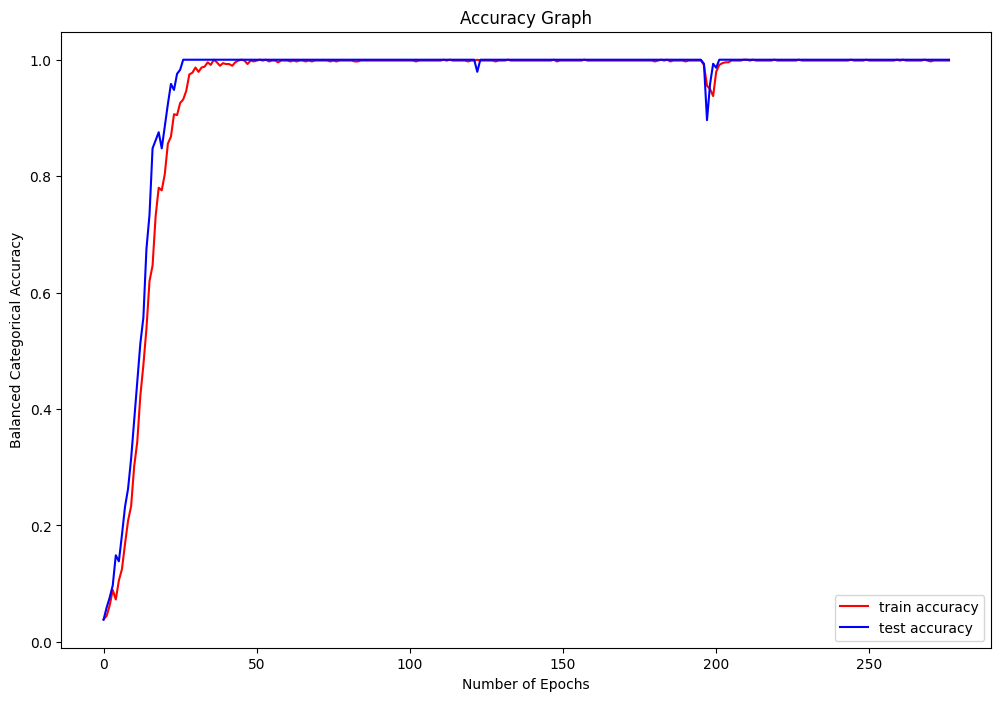

In [65]:
plt.plot(r.history['balanced_accuracy'],'r',label='train accuracy')
plt.plot(r.history['val_balanced_accuracy'],'b',label='test accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Balanced Categorical Accuracy')
plt.title('Accuracy Graph')
plt.legend();

In [66]:
loss, acc = model.evaluate({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']},test_df.Category)
print("Test Sparse Categorical Crossentropy Loss:", loss)
print("Test Balanced Categorical Accuracy:", acc)

10/10 [==============================] - 2s 207ms/step - loss: 0.1516 - balanced_accuracy: 1.0000
Test Sparse Categorical Crossentropy Loss: 0.151577889919281
Test Balanced Categorical Accuracy: 1.0


In [67]:
test_predictions = model.predict({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']})
test_predictions = np.argmax(test_predictions,axis=1)
test_predictions

10/10 [==============================] - 4s 205ms/step


array([ 3, 14,  0,  0, 19, 10, 24, 21, 19, 15, 18, 13, 24, 24, 14,  7,  3,
       17, 23,  0, 13, 17,  9, 11, 14, 20,  4,  9, 17,  9, 20,  4,  4, 21,
        6, 12,  9, 23, 12, 24, 14, 24, 10,  9,  9, 18, 10, 21, 23,  3, 14,
       20, 14, 12,  1, 24,  6, 23, 16,  6, 12, 21, 14, 23, 24,  0, 16,  5,
        7, 22, 10,  0,  6,  2, 23,  3,  8,  3, 15, 18, 24, 19, 17,  3,  4,
       22,  2, 20, 14, 24,  9, 21,  0, 15,  3, 20, 20,  4, 10,  9,  9, 24,
       17, 11, 16,  1,  5,  3,  3,  9, 23, 17, 16,  0, 18, 22, 20,  4, 14,
       16, 14, 21,  2,  3,  5, 20,  1, 23,  5,  5,  8, 22,  6, 10, 15,  9,
        3,  9, 18,  0, 19, 10,  6,  5,  9,  7, 19,  5,  6,  4,  3,  4, 11,
        6,  9,  1,  5, 12, 20, 17, 13,  4, 13,  9, 16, 15,  9,  0, 24, 21,
       24, 21, 10, 18, 11, 11, 15,  5, 21, 24,  0,  4, 20, 18, 21, 24, 14,
        4,  6,  4,  0,  9, 21, 13,  4, 21,  4, 11, 14,  4,  5,  7, 17,  1,
        6,  7,  9, 23, 18, 14,  0, 23, 12, 23,  3, 21,  9, 21,  3, 20,  1,
       20, 14, 16, 20, 21

In [68]:
print("Confusion Matrix:")
print(confusion_matrix(test_df.Category,test_predictions))
print("Classification Report:")
print(classification_report(test_df.Category,test_predictions))

Confusion Matrix:
[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0

In [69]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import AutoTokenizer, TFDistilBertForSequenceClassification


In [71]:
import tensorflow as tf
from transformers import TFDistilBertForSequenceClassification
tf.keras.utils.get_custom_objects()["TFDistilBertForSequenceClassification"] = TFDistilBertForSequenceClassification
model = tf.keras.models.load_model('/content/resume_parser.h5')

In [72]:
tokenizer = AutoTokenizer.from_pretrained("manishiitg/distilbert-resume-parts-classify")
bert_model = TFDistilBertForSequenceClassification.from_pretrained("manishiitg/distilbert-resume-parts-classify", from_pt=True)

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [78]:
import re

def clean_html(text):
    cleanr = re.compile('<.*?>')
    return re.sub(cleanr, '', text)

def remove_digits(text):
    return re.sub(r'\d+', '', text)

def remove_links(text):
    return re.sub(r'http\S+', '', text)

def remove_special_characters(text):
    return re.sub(r'[^\w\s]', '', text)

def punct(text):
    return re.sub(r'[!"#$%&()*+,-/:;<=>?@[\]^_`{|}~]', '', text)

def non_ascii(text):
    return ''.join(char for char in text if ord(char) < 128)

def email_address(text):
    return re.sub(r'\S*@\S*\s?', '', text)

def lower(text):
    return text.lower()

In [79]:
import re

def preprocess_text(text):
    text = clean_html(text)
    text = remove_special_characters(text)
    text = remove_digits(text)
    text = remove_links(text)
    text = email_address(text)
    text = punct(text)
    text = non_ascii(text)
    text = lower(text)
    return text

In [80]:
def categorize_and_move(input_csv, output_dir):
    categorized_resumes = []

    resume_df = pd.read_csv(input_csv)

    for index, row in resume_df.iterrows():
        resume_text = row['Resume']
        category = row['Category']

        preprocessed_resume = preprocess_text(resume_text)
        encoded_resume = tokenizer(preprocessed_resume, padding=True, truncation=True, max_length=max_resume_len, return_tensors='tf')
        category_prediction = model.predict({'input_ids': encoded_resume['input_ids'], 'attention_mask': encoded_resume['attention_mask']})
        predicted_category = np.argmax(category_prediction, axis=1)[0]
        category_folder = os.path.join(output_dir, str(predicted_category))
        if not os.path.exists(category_folder):
            os.makedirs(category_folder)
        new_file_path = os.path.join(category_folder, f"{index}_{row['Category']}.txt")
        with open(new_file_path, 'w') as file:
            file.write(resume_text)

        categorized_resumes.append({'filename': f"{index}_{row['Category']}.txt", 'category': category})

    return categorized_resumes

In [81]:
input_csv = '/content/drive/MyDrive/Resume Data/UpdatedResumeDataSet.csv'
output_directory = '/content/drive/MyDrive/Resume Data'
max_resume_len = 200

In [82]:
categorized_resumes = categorize_and_move(input_csv, output_directory)

# Create categorized_resumes.csv
categorized_df = pd.DataFrame(categorized_resumes)
categorized_df.to_csv('categorized_resumes.csv', index=False)

1/1 [==============================] - 0s 61ms/step


In [83]:
!pip freeze > requirements.txt